In [9]:
import  numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import control.matlab as ml
from scipy import signal

In [10]:
def aumentar_x_veces_20dB(x, numerador):
    return (10**x)*numerador

# Setear transferencia

In [11]:
#Transferencia a partir de polos y ceros
ceros = [0]
polos = [np.complex(-30, .40), np.complex(-30, 40)]


numerador = poly.polyfromroots(ceros)
denominador = poly.polyfromroots(polos)

numerador = numerador[::-1]
denominador = denominador[::-1]

In [12]:
denominador

array([  1.   +0.j ,  60.  -40.4j, 884.-1212.j ])

In [17]:
G = ml.tf(numerador, denominador)*72.33
G


      72.33 s
--------------------
s^2 + 72.33 s + 1500

# Chequeo polos

In [18]:
#calcular polos
roots = np.roots(numerador)
print("cantidad de raices")
print(len(roots))
print("raices:")
print(roots)

cantidad de raices
1
raices:
[0.]


In [19]:
coeficientes = poly.polyfromroots(roots)
print("Coeficientes: ")
print(coeficientes)

Coeficientes: 
[-0.  1.]


# Bode

/home/rodrigo/python-virtual-environments/adc/lib/python3.6/site-packages/control/xferfcn.py:919: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
/home/rodrigo/python-virtual-environments/adc/lib/python3.6/site-packages/control/xferfcn.py:935: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


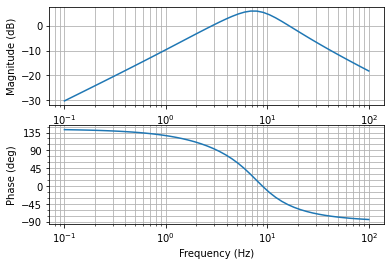

In [20]:
mod, fase, w = ml.bode(G)
plt.show()

# Respuesta al escalon

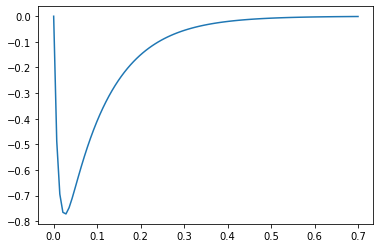

In [19]:
yout, T = ml.step(G)
plt.plot(T,yout)
plt.show()

# Respuesta al impulso

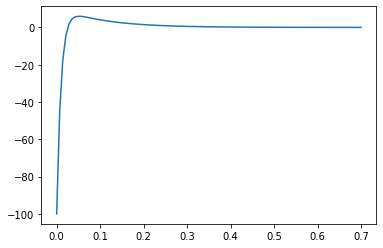

In [20]:
yout, T = ml.impulse(G)
plt.plot(T,yout)
plt.show()

# Respuesta a la cuadrada o al seno

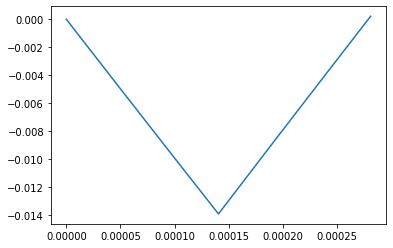

In [21]:
frecuencia = 3560 #en Hz
periodo = 1/frecuencia #en segundos
t = np.linspace(0, 1*periodo, 100000, endpoint=False)

sig = signal.square(2 * np.pi * frecuencia * t) #Respuesta a la cuadrada
#sig = np.sin(2*np.pi*frecuencia*t) #Respuesta al seno

yout, T, xout = ml.lsim(G, U = sig, T = t)
plt.plot(T,yout)
#plt.plot(t, sig)
plt.show()

In [5]:
from sympy import factor, symbols, simplify

In [6]:
s = symbols('s')

In [7]:
s1 = np.complex(-1000, 433)
s2 = np.complex(-1000, -433)

In [8]:
s1*s2

(1187489+0j)

In [12]:
simplify((s-s1)*(s-s2))

1.0*s**2 + 2000.0*s + 1187489.0

In [16]:
np.sqrt(1187489.0 ) / 2000

0.5448598443636675